# Covid-19 - India Reports

# Global Pandemic

With China reporting more than 70k cases of the virus and cases being reported from over 100 countries icluding the USA, Australia, Cambodia, Canada, Italy, Japan, France, Malaysia, Japan, South Korea, Thailand, etc.. with a global total of confirmed cases being 182,997 the World Health Organization has declared the crisis as a Pandemic. 

## India Reports

In several cities, many people having symptoms of the virus infection are kept under observation in hospitals. According to WHO till the 17th of March a total of 129 COVID-19 cases have been reported in India. They include 112 Indian nationals, 17 foreign nationals, 10 recovered and 2 deaths. State-wise cases of COVID-19 have been reported from 13 States/UTs: Andhra Pradesh (1 case), Delhi (7 cases), Haryana (14 cases), Jammu & Kashmir (2 cases), Karnataka (6 cases), Kerala (24 cases), Ladakh (3 cases), Maharashtra (33 cases), Punjab (1 case), Rajasthan (4 cases), Telangana (3 cases), Tamil Nadu (1 case), Uttar Pradesh (12 cases) and Odisha (1 case).

**The Govt. helpline number: 011-239 78046, will remain operational. Besides the toll-free numbers,the ministry also issued a helpline email ID - ncov2019@gmail.com.**

Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/health-ministry-launches-new-toll-free-number-email-id-for-queries-on-covid-19/articleshow/74661190.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


## Previous Work on Covid-19
1. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geo-statistical-analysis
2. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geographical-analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/indian-state-geojson-data/india_state_geo.json
/kaggle/input/coronavirus-cases-in-india/Covid cases in India.csv
/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv
/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/covid19-corona-virus-india-dataset/patients_data.csv
/kaggle/input/covid19-corona-virus-india-dataset/patient_wise_data_

**Install Required Libraries...**

In [2]:
!pip install GeoText

     |████████████████████████████████| 2.0 MB 6.0 MB/s eta 0:00:01


In [3]:
# import the necessary libraries

import numpy as np 
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs
import plotly as ply
import pycountry
import folium 
from folium import plugins
import json
from pandas.io.json import json_normalize
from geotext import GeoText
from wordcloud import WordCloud



%config InlineBackend.figure_format = 'retina'
init_notebook_mode(connected=True)

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# India Latitude Longitude
India_Latitude = 21.7679
India_Longitude = 78.8718 

In [4]:
# Utility Functions

'''Display markdown formatted output like bold, italic bold etc.'''
def formatted_text(string):
    display(Markdown(string))


'''highlight the maximum in a Series or DataFrame'''  
def highlight_max(data, color='red'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
    


# Utility Plotting Functions

def plotDailyReportedCasesOverTime(df, country):
    # confirmed
    fig = px.bar(df, x="Date", y="Confirmed")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of confirmed cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Confirmed cases")

    fig.update_layout(layout)
    fig.show()

    # deaths
    fig = px.bar(df, x="Date", y="Deaths")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of reported deaths in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Deaths Reported")

    fig.update_layout(layout)
    fig.show()

    # recovered
    fig = px.bar(df, x="Date", y="Recovered")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of recovered cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Recovered Cases")

    fig.update_layout(layout)
    fig.show()
    
# Cases over time
def scatterPlotCasesOverTime(df, country):
    plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered"))

    subPlot1 = go.Scatter(
                    x=df['Date'],
                    y=df['Confirmed'],
                    name="Confirmed",
                    line_color='orange',
                    opacity=0.8)

    subPlot2 = go.Scatter(
                    x=df['Date'],
                    y=df['Deaths'],
                    name="Deaths",
                    line_color='red',
                    opacity=0.8)

    subPlot3 = go.Scatter(
                    x=df['Date'],
                    y=df['Recovered'],
                    name="Recovered",
                    line_color='green',
                    opacity=0.8)

    plot.append_trace(subPlot1, 1, 1)
    plot.append_trace(subPlot2, 1, 2)
    plot.append_trace(subPlot3, 1, 3)
    plot.update_layout(template="ggplot2", title_text = country + '<b> - Spread of the nCov Over Time</b>')

    plot.show()

 ## Daywise numbers of the cases reported

In [5]:
covid_19_India = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
population_India_census2011 = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")

covid19_complete = pd.read_csv('../input/covid19-corona-virus-india-dataset/complete.csv', parse_dates=['Date'])

covid_19_India.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
# covid_19_India['Confirmed'] = covid_19_India['ConfirmedIndianNational'] + covid_19_India['ConfirmedForeignNational']
covid_19_India.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)

covid_19_India.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


## Statewise Covid-19 Cases...

In [7]:
covid_India_cases = pd.read_csv('../input/coronavirus-cases-in-india/Covid cases in India.csv')

# Coordinates of Indian States
India_Lat_Lon = pd.read_csv('../input/coronavirus-cases-in-india/Indian Coordinates.csv')

# Day by day data
dbd_India = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name='India')
dbd_Italy = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Italy")
dbd_Korea = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Korea")

covid_India_cases.head()

,S. No.,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,226,1,3
1,2,Andaman and Nicobar Islands,10,0,0
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,26,0,0
4,5,Bihar,30,0,1


In [8]:
covid_India_cases.rename(columns={'Name of State / UT': 'State', 'Cured/Discharged/Migrated': 'Recovered', 'Total Confirmed cases': 'Confirmed'}, inplace=True)

# covid_India_cases['Confirmed'] = covid_India_cases['Total Confirmed cases (Indian National)'] + covid_India_cases['Total Confirmed cases ( Foreign National )']

# Active Case = confirmed - deaths - recovered
covid_India_cases['Active'] = covid_India_cases['Confirmed'] - covid_India_cases['Deaths'] - covid_India_cases['Recovered']

covid_India_cases.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])

,S. No.,State,Confirmed,Recovered,Deaths,Active
0,1,Andhra Pradesh,226,1,3,222
1,2,Andaman and Nicobar Islands,10,0,0,10
2,3,Arunachal Pradesh,1,0,0,1
3,4,Assam,26,0,0,26
4,5,Bihar,30,0,1,29
5,6,Chandigarh,18,0,0,18
6,7,Chhattisgarh,9,3,0,6
7,8,Delhi,503,18,7,478
8,9,Goa,7,0,0,7
9,10,Gujarat,122,18,11,93


In [9]:
fig = px.bar(covid_India_cases.sort_values('Confirmed', ascending=False).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="State", title='Total Confirmed Cases', text='Confirmed', orientation='h', 
             width=16*(max(covid_India_cases['Confirmed']) + 2), height=700, range_x = [0, max(covid_India_cases['Confirmed']) + 2])
fig.update_traces(marker_color='#0726ed', opacity=0.8, textposition='outside')

fig.update_layout(plot_bgcolor='rgb(208, 236, 245)')
fig.show()

**The above state-wise data and the plot show that Kerela and Maharashtra are the 2 worst affected states in the country followed by Karnataka, Uttar Pradesh, Telengana, Rajasthan. 
As the numbers in these states are increasing and India entering it's 3rd week/phase of the spread we could possibly think (though still early to say) in terms of the community level spread.**

****Now lets see the spread day wise. India reported it's first case on 30th January. Post that for a long period of time for almost a month we did not see any rise in the cases being reported. The numbers have started to increase from the starting of March.****

# Foreign vs Indian Cases...

In [10]:
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Indian Cases","Foreign Cases"))

# # Indian Nationals
# Indian = covid_India_cases.sort_values('Total Confirmed cases (Indian National)', ascending=False).sort_values('Total Confirmed cases (Indian National)', ascending=False)

# fig.add_trace(go.Bar( y=Indian['Total Confirmed cases (Indian National)'], x=Indian["State"],  
#                      marker=dict(color=Indian['Total Confirmed cases (Indian National)'], coloraxis="coloraxis")), 1, 1)

# # Foreign Nationals
# foreign = covid_India_cases.sort_values('Total Confirmed cases ( Foreign National )', ascending=False).sort_values('Total Confirmed cases ( Foreign National )', ascending=False)

# fig.add_trace(go.Bar( y=foreign['Total Confirmed cases ( Foreign National )'], x=foreign["State"], 
#                      marker=dict(color=foreign['Total Confirmed cases ( Foreign National )'], coloraxis="coloraxis")), 1, 2)                     
                     

# fig.update_layout(coloraxis=dict(colorscale='hsv'), showlegend=False,title_text="Indian vs Foreign Cases",plot_bgcolor='rgb(255, 255, 255)')
# fig.show()

In [11]:
covid_19_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 9 columns):
Sno                         770 non-null int64
Date                        770 non-null object
Time                        770 non-null object
State                       770 non-null object
ConfirmedIndianNational     770 non-null object
ConfirmedForeignNational    770 non-null object
Recovered                   770 non-null int64
Deaths                      770 non-null int64
Confirmed                   770 non-null int64
dtypes: int64(4), object(5)
memory usage: 54.3+ KB


In [12]:
# covid_19_India['Confirmed'] = covid_19_India['Confirmed'].replace('--', 0)
# covid_19_India['Confirmed'] = pd.to_numeric(covid_19_India['Confirmed'], errors='coerce', downcast='integer')

# covid_19_India.head()

In [13]:
temp = covid_19_India[["Date","Confirmed","Deaths","Recovered"]]
temp['Date'] = temp['Date'].apply(pd.to_datetime, dayfirst=True)

date_wise_data = temp.groupby(["Date"]).sum().reset_index()

formatted_text('***Day wise distribution for Confirmed, Deaths and Recovered Cases***')
# pd.set_option('display.max_rows', 100) 
date_wise_data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



***Day wise distribution for Confirmed, Deaths and Recovered Cases***

,Date,Confirmed,Deaths,Recovered
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0
...,...,...,...,...
65,2020-04-04,3072,75,213
66,2020-04-05,3577,83,275
67,2020-04-06,4281,111,319
68,2020-04-07,4789,124,353


### Reported Confirmed, Deaths and Recovered cases over time...

In [14]:
temp = date_wise_data.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
# temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.show()

In [16]:
# Load the Indian state geo json file

# with open('../input/indian-state-geojson-data/india_state_geo.json') as file:
#     ind_geo = json.load(file)

# India_conf_choropleth = go.Figure(go.Choroplethmapbox(geojson=ind_geo, locations=Covid_India_With_Location['State'],
#                                                       z=Covid_India_With_Location['TotalConfirmed'], colorscale='Sunset',
#                                                       zmin=0, zmax=max(Covid_India_With_Location.TotalConfirmed), marker_opacity=0.5, marker_line_width=0))

# India_conf_choropleth.update_layout(mapbox_style="carto-positron", mapbox_zoom=3.5, 
#                                     mapbox_center = {"lat": India_Latitude, "lon": India_Longitude})

# India_conf_choropleth.update_layout(margin={"r":10,"t":0,"l":10,"b":0})

# iplot(India_conf_choropleth)



In [17]:
# Affected States

nCoV_States = covid_19_India['State'].unique().tolist()
print('\n')
print(nCoV_States)
print("\n------------------------------------------------------------------")
print("\nTotal States affected by nCoV: ",len(nCoV_States))



['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura']

------------------------------------------------------------------

Total States affected by nCoV:  32


***Confirmed Cases vs Day***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 <a list of 70 Text xticklabel objects>)

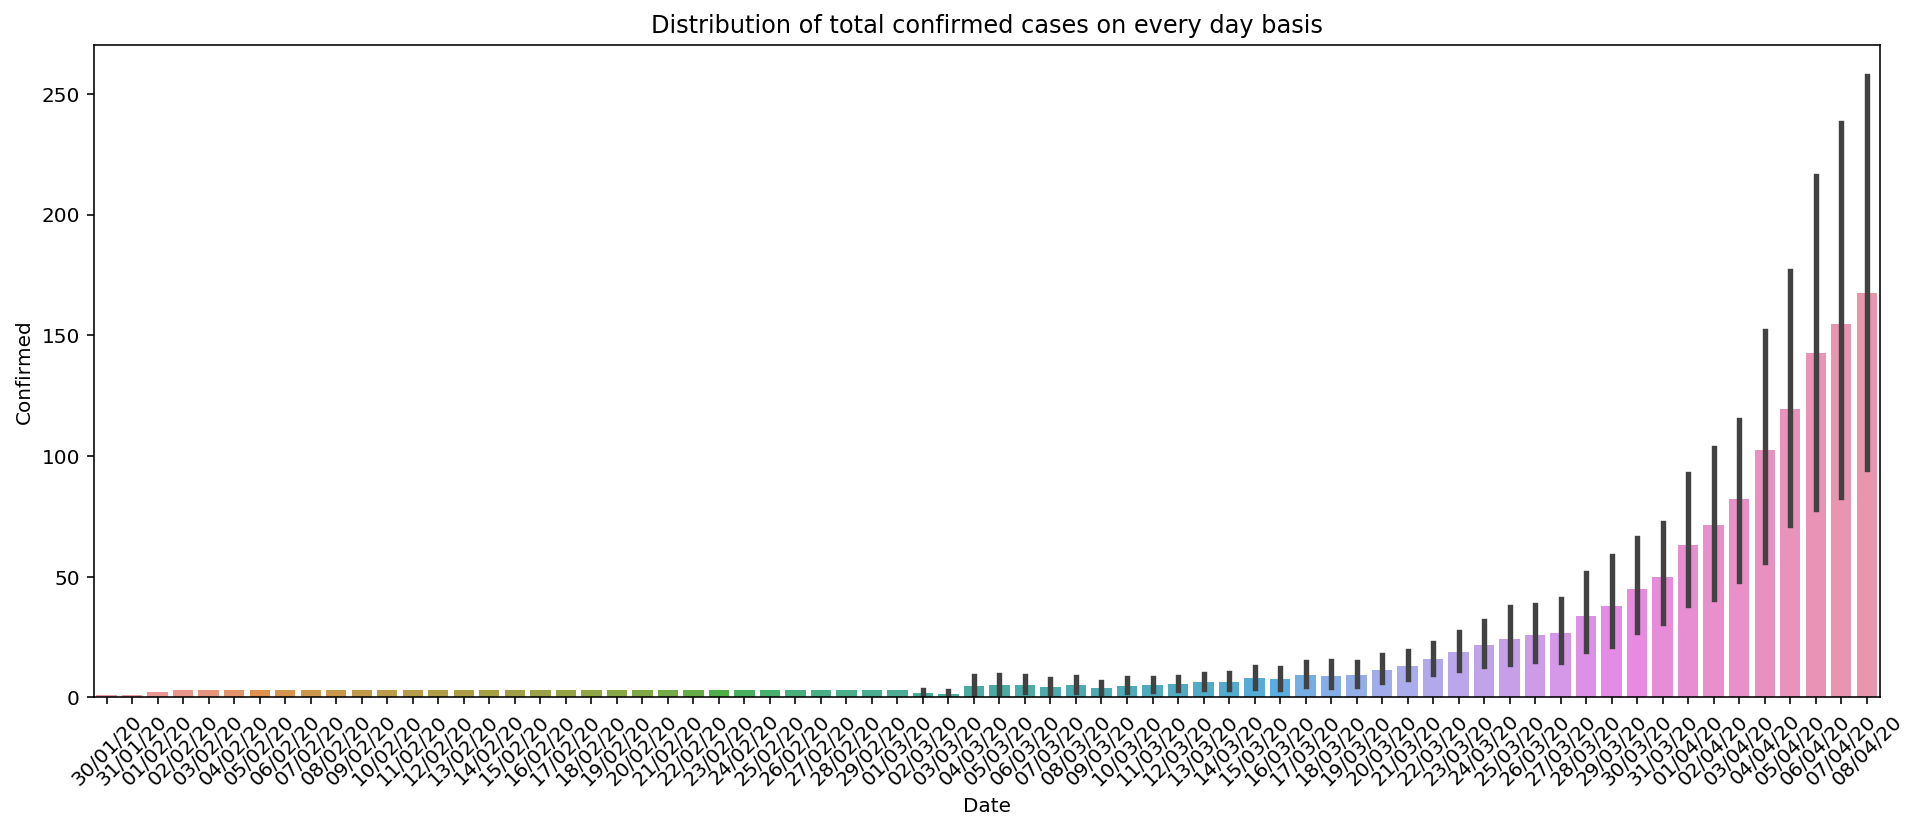

In [18]:
formatted_text('***Confirmed Cases vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Confirmed',data=covid_19_India, order=covid_19_India.Date.unique().tolist())
plt.title('Distribution of total confirmed cases on every day basis')
plt.xticks(rotation=45)

# India Spread Over Time...

In [19]:
# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.

scatterPlotCasesOverTime(date_wise_data, "<b>India</b>")

In [20]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(date_wise_data, "INDIA")

In [21]:
covid19_complete.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )',
       'Cured/Discharged/Migrated', 'Latitude', 'Longitude', 'Death',
       'Total Confirmed cases'],
      dtype='object')

In [22]:
covid19_complete.rename(columns={'Name of State / UT': 'State_UT', 'Cured/Discharged/Migrated': 'Recovered', 'Total Confirmed cases': 'Confirmed', 'Death': 'Deaths'}, inplace=True)

for i in ['Confirmed', 'Deaths', 'Recovered']:
    covid19_complete[i] = covid19_complete[i].astype('int')

# Derived Columns
covid19_complete['Active'] = covid19_complete['Confirmed'] - covid19_complete['Deaths'] - covid19_complete['Recovered']
covid19_complete['Mortality_rate(%)'] = covid19_complete['Deaths']/covid19_complete['Confirmed'] * 100
covid19_complete['Recovery_rate(%)'] = covid19_complete['Recovered']/covid19_complete['Confirmed'] * 100

covid19_complete = covid19_complete[['Date', 'State_UT', 'Latitude', 'Longitude', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Recovery_rate(%)', 'Mortality_rate(%)']]

covid19_complete.head()

,Date,State_UT,Latitude,Longitude,Confirmed,Active,Recovered,Deaths,Recovery_rate(%),Mortality_rate(%)
0,2020-01-30,Kerala,10.8505,76.2711,1,1,0,0,0.0,0.0
1,2020-01-31,Kerala,10.8505,76.2711,1,1,0,0,0.0,0.0
2,2020-02-01,Kerala,10.8505,76.2711,2,2,0,0,0.0,0.0
3,2020-02-02,Kerala,10.8505,76.2711,3,3,0,0,0.0,0.0
4,2020-02-03,Kerala,10.8505,76.2711,3,3,0,0,0.0,0.0


### Latest Data

In [23]:
# Get the latest data
latest_day = max(covid19_complete['Date'])
day_before = latest_day - timedelta(days = 1)

# state wise data and new cases reported in the last day
latest_day_data = covid19_complete[covid19_complete['Date']==latest_day].set_index('State_UT')
day_before_data = covid19_complete[covid19_complete['Date']==day_before].set_index('State_UT')

temp = pd.merge(left = latest_day_data, right = day_before_data, on='State_UT', suffixes=('_latest_day', '_previous_day'), how='outer')

# Get the number of new cases reported in the last day
latest_day_data['New_cases_reported'] = temp['Confirmed_latest_day'] - temp['Confirmed_previous_day']
latest = latest_day_data.reset_index()
latest.fillna(1, inplace=True)

temp = latest[['State_UT', 'Confirmed', 'Active', 'New_cases_reported','Recovered', 'Deaths', 'Recovery_rate(%)', 'Mortality_rate(%)']]
temp = temp.sort_values('Confirmed', ascending=False).reset_index(drop=True)

temp.style\
    .background_gradient(cmap="Blues", subset=['Confirmed', 'Active', 'New_cases_reported'])\
    .background_gradient(cmap="Greens", subset=['Recovered', 'Recovery_rate(%)'])\
    .background_gradient(cmap="Reds", subset=['Deaths', 'ortality_rate(%)'])

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning:

invalid value encountered in less



,State_UT,Confirmed,Active,New_cases_reported,Recovered,Deaths,Recovery_rate(%),Mortality_rate(%)
0,Maharashtra,1018,875,270,79,64,7.76031,6.28684
1,Tamil Nadu,690,664,69,19,7,2.75362,1.01449
2,Delhi,576,546,53,21,9,3.64583,1.5625
3,Telengana,364,322,43,35,7,9.61538,1.92308
4,Kerala,336,264,9,70,2,20.8333,0.595238
5,Rajasthan,328,304,40,21,3,6.40244,0.914634
6,Uttar Pradesh,326,302,21,21,3,6.44172,0.920245
7,Andhra Pradesh,305,300,39,1,4,0.327869,1.31148
8,Madhya Pradesh,229,216,64,0,13,0,5.67686
9,Karnataka,175,146,24,25,4,14.2857,2.28571


In [24]:
ordered_latest = latest.sort_values('Confirmed', ascending=False)
# state_order = temp['State/UT']

fig = px.bar(latest.sort_values('Confirmed', ascending=False), 
             x="Confirmed", y="State_UT", color='State_UT', title='Confirmed',
             orientation='h', text='Confirmed', height=700,
             color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

In [25]:
date_wise_data = covid19_complete[["Date", 'State_UT', "Confirmed","Deaths","Recovered",'Active']]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
temp = date_wise_data.copy()
temp['Recovery_rate(%)'] = temp['Recovered']/temp['Confirmed']*100
temp['Mortality_rate(%)'] = temp['Deaths']/temp['Confirmed']*100

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovery_rate(%)'],
                    mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Cummulative Recovery Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Mortality_rate(%)'],
                    mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Cummulative Mortality Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

### Combined Weekly Trend - India

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=date_wise_data['Date'], y=date_wise_data['Confirmed'],
                    mode='lines+markers',marker_color='blue',name='Total Cases'))

fig.add_trace(go.Scatter(x=date_wise_data['Date'],y=date_wise_data['Active'], 
                mode='lines+markers',marker_color='purple',name='Active'))

fig.add_trace(go.Scatter(x=date_wise_data['Date'], y=date_wise_data['Recovered'],
                mode='lines+markers',marker_color='green',name='Recovered'))

fig.add_trace(go.Scatter(x=date_wise_data['Date'], y=date_wise_data['Deaths'], 
                mode='lines+markers',marker_color='red',name='Deaths'))

fig.update_layout(title_text='Combined Weekly Trend - India',plot_bgcolor='rgb(275, 270, 273)',width=800, height=800)
fig.show()

## Age wise trend...

In [30]:
agegroup_data = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
agegroup_data.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=agegroup_data['AgeGroup'],y=agegroup_data['TotalCases'],line_shape='spline',fill='tonexty',fillcolor = 'orange')) 
fig.update_layout(title="Age wise Trend...",yaxis_title="Total Number of cases",xaxis_title="Age Group")
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=800,height=600)
fig.show()

In [32]:
temp = agegroup_data.copy()
temp['Percentage'] = temp['Percentage'].str.rstrip('%')
temp['Percentage'] = pd.to_numeric(temp['Percentage'])
temp.reset_index()
temp.set_index(["AgeGroup"], inplace = True, append = False, drop = True) 
temp

,Sno,TotalCases,Percentage
AgeGroup,,,
0-9,1,22,3.18
10-19,2,27,3.90
20-29,3,172,24.86
30-39,4,146,21.10
40-49,5,112,16.18
50-59,6,77,11.13
60-69,7,89,12.86
70-79,8,28,4.05
>=80,9,10,1.45


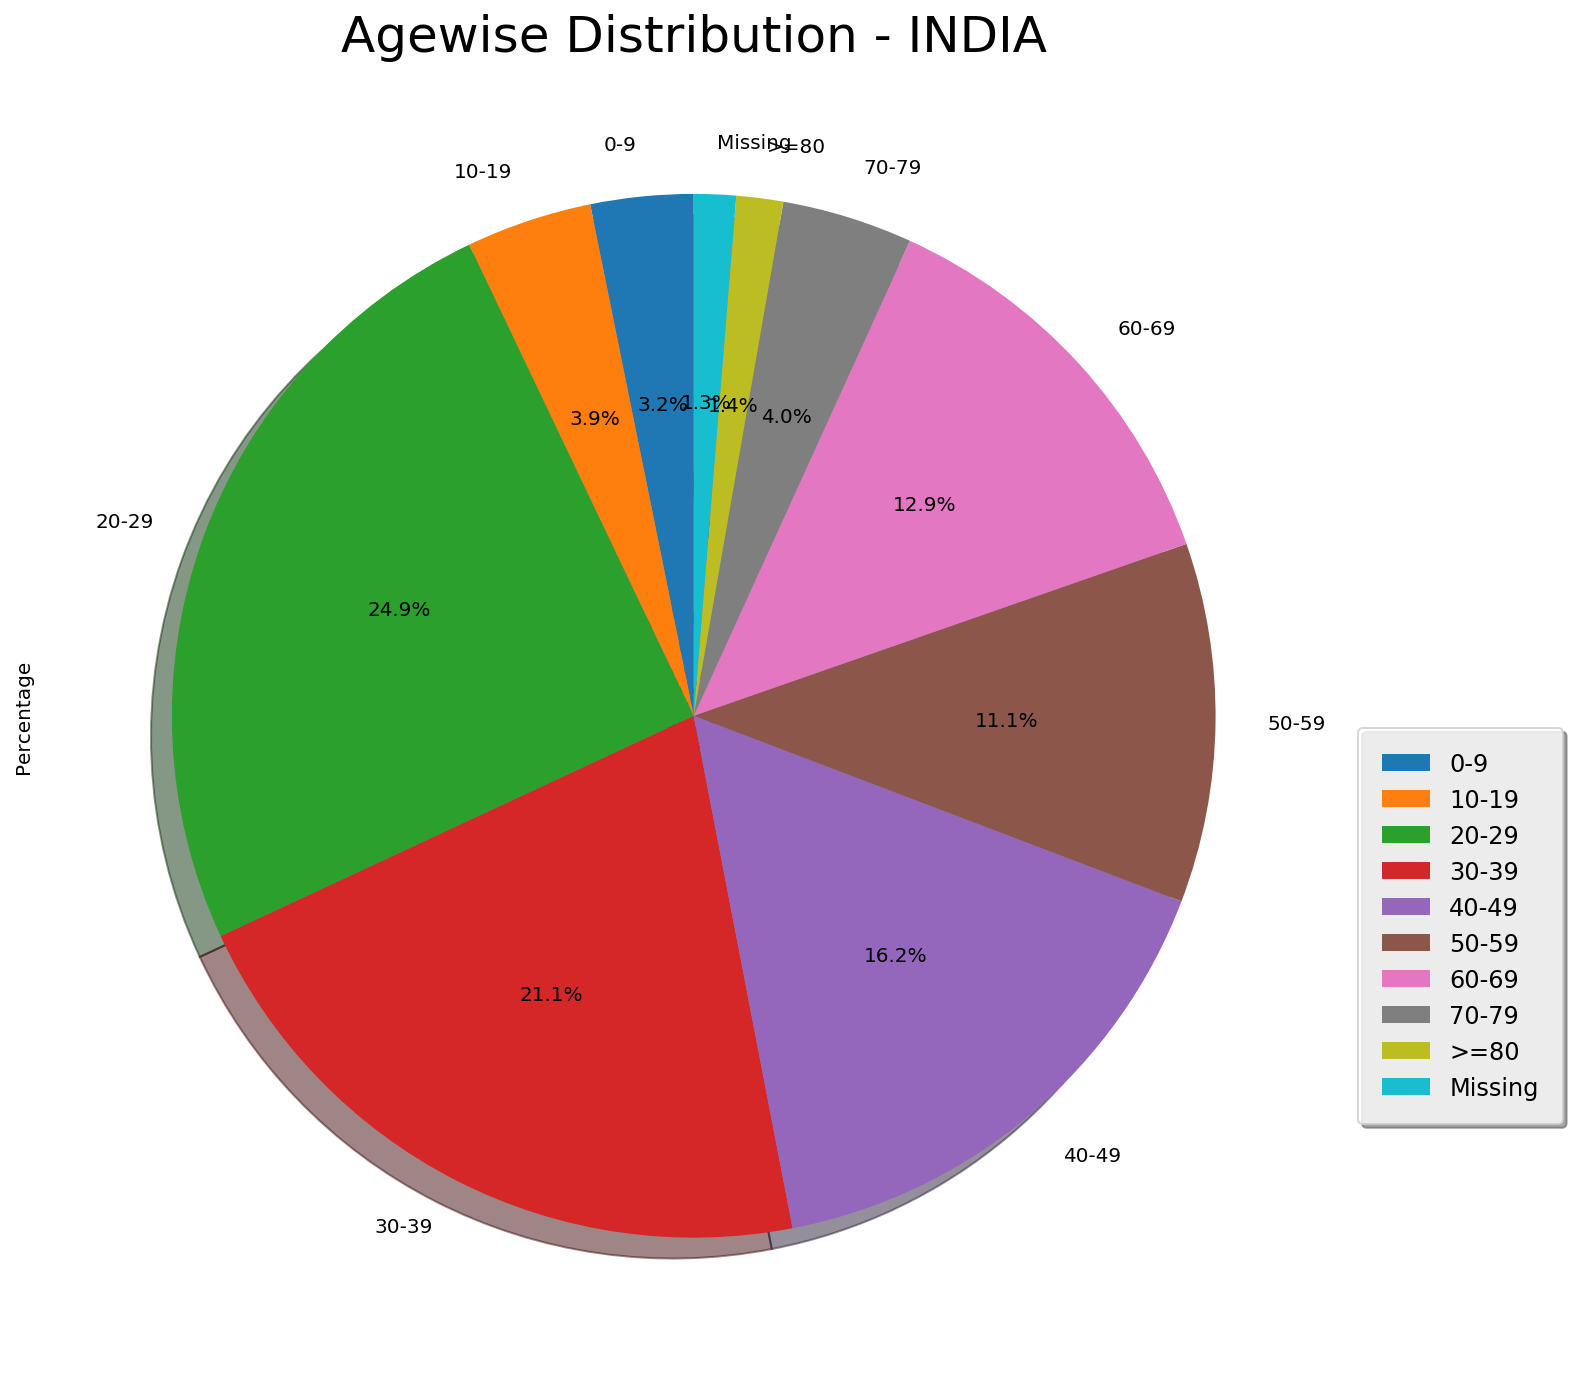

In [33]:

plt.figure(figsize=(12,12))

temp['Percentage'].plot( kind='pie'
           , autopct='%1.1f%%'
           , shadow=True
           , startangle=90)

plt.title('Agewise Distribution - INDIA',size=25)
plt.legend(loc = "best"
           , fontsize = 12
           , ncol = 1 
           , fancybox = True
           , framealpha = 0.80
           , shadow = True
           , borderpad = 1
           , bbox_to_anchor=(1,0.5));

### Patient Level Analysis...

Data @ https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml

APIs available for public access @ https://api.covid19india.org/

* National time series, statewise stats and test counts	    https://api.covid19india.org/data.json

* State-district-wise	                                    https://api.covid19india.org/state_district_wise.json

* State-district-wise V2	                                https://api.covid19india.org/v2/state_district_wise.json

* Travel history	                                        https://api.covid19india.org/travel_history.json

* Raw data	                                            https://api.covid19india.org/raw_data.json

* States Daily changes	                                https://api.covid19india.org/states_daily.json



In [34]:
# url = 'https://api.covid19india.org/raw_data.json'

# # Load the first sheet of the JSON file into a data frame
# df = pd.read_json(url, orient='columns')
# df1 = json_normalize(df['raw_data'])
# df1.head()

In [35]:
covid19_patients = pd.read_csv('../input/covid19-corona-virus-india-dataset/patients_data.csv')
covid19_patients.head()

,patient_number,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,current_status,notes,suspected_contacted_patient,nationality,type_of_transmission,status_change_date,source_1,source_2,source_3,backup_notes
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN
1,2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


In [36]:
covid19_patients['date_announced'] = pd.to_datetime(covid19_patients['date_announced'], dayfirst=True)
covid19_patients['status_change_date'] = pd.to_datetime(covid19_patients['status_change_date'], dayfirst=True)

In [37]:
covid19_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 19 columns):
patient_number                 5360 non-null int64
state_patient_number           1141 non-null object
date_announced                 5360 non-null datetime64[ns]
age_bracket                    1009 non-null object
gender                         1448 non-null object
detected_city                  876 non-null object
detected_district              4420 non-null object
detected_state                 5360 non-null object
state_code                     5360 non-null object
current_status                 5359 non-null object
notes                          4142 non-null object
suspected_contacted_patient    1139 non-null object
nationality                    1100 non-null object
type_of_transmission           2630 non-null object
status_change_date             5250 non-null datetime64[ns]
source_1                       5150 non-null object
source_2                       1576 non-null ob

**Many values from Age and Gender information are missing. Out of the information that is available we will try to check the trend...**

In [38]:
px.histogram(covid19_patients, x='age_bracket', color_discrete_sequence = ['#00ff95'], nbins=50, title='Age Distribution...')

In [39]:
covid19_patients.dropna(subset=['current_status', 'age_bracket'], inplace=True)
covid19_patients.reset_index(drop=True, inplace=True)

covid19_patients_deceased = covid19_patients[covid19_patients['current_status'] == 'Deceased']
covid19_patients_hospitalized = covid19_patients[covid19_patients['current_status'] == 'Hospitalized']
covid19_patients_recovered = covid19_patients[covid19_patients['current_status'] == 'Recovered']

fig = go.Figure()
fig.add_trace(go.Box(y=covid19_patients_deceased['age_bracket'], name="Deceased Patients"))
fig.add_trace(go.Box(y=covid19_patients_hospitalized['age_bracket'], name="Hospitalized Patients"))
fig.add_trace(go.Box(y=covid19_patients_recovered['age_bracket'], name="Recovered Patients"))
fig.update_layout(title_text='Indian COVID-19 Patients Outcome Age-Wise')
fig.show()

**This above plot implies that majority of the deceased patients belong to the elderly group between thr age 55 to 70. However, the virus can affect the younger generation as well. Many of the hospitalized patients are in the age group starting from 25 to 50 years.**

### Gender

In [40]:
px.histogram(covid19_patients, x='gender', color_discrete_sequence = ['#00aeff'], title='Gender Distribution...')

In [41]:
temp = covid19_patients['gender'].value_counts().rename_axis('gender').reset_index(name='counts')

fig = make_subplots(
    rows=1, cols=1,
    subplot_titles = ['Gender Distribution...'],
    specs=[[{"type": "pie"}]]
)

fig.add_trace(go.Pie(values=temp.counts.tolist(), labels=['Male', 'Female'], marker_colors = ['#6a0572', '#39065a']),1,1)
fig.show()

### Current Patient Status...

In [42]:
px.histogram(covid19_patients, x='current_status', color_discrete_sequence = ['#00aeff'], title='Current Status...')

### Total Numbers vs Current Status...

In [43]:
fig = make_subplots(
    rows=1, cols=2, column_widths=[0.7, 0.3],
    subplot_titles = ['Patients ratio', 'Current status'],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = covid19_patients[['age_bracket', 'current_status']].dropna()

gen_grp = temp.groupby('current_status').count()

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)

fig.add_trace(go.Histogram(x=temp[temp['current_status']=='Deceased']['age_bracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['current_status']=='Recovered']['age_bracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['current_status']=='Hospitalized']['age_bracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'

fig.show()

### Nationality...

In [44]:
temp = covid19_patients.groupby('nationality')['patient_number'].count().reset_index()
temp = temp.sort_values('patient_number')
# temp = temp[temp['nationality']!='India']
px.bar(temp, x='patient_number', y='nationality', orientation='h', text='patient_number', width=600,
       color_discrete_sequence = ['#eb4034'], title='Nationality - Indian Cases vs Foreign Cases...')

### Detailed Treemap - State, Ditrict, City...

In [45]:
locations = covid19_patients.groupby(['detected_state', 'detected_district', 'detected_city'])['patient_number'].count().reset_index()
locations['country'] = 'India'
fig = px.treemap(locations, path=["country", "detected_state", "detected_district", "detected_city"], values="patient_number", height=700,
           title='State ---> District --> City', color_discrete_sequence = px.colors.qualitative.Prism)

fig.data[0].textinfo = 'label+text+value+percent entry+percent root'
fig.show()

### Days to Recovery...

In [46]:
days_to_status_change = covid19_patients[['date_announced', 'status_change_date', 'current_status']].dropna()

days_to_status_change = days_to_status_change[days_to_status_change['status_change_date'] != days_to_status_change['date_announced']]
days_to_status_change['days_to_status_change'] = days_to_status_change['status_change_date'] - days_to_status_change['date_announced']
days_to_status_change['days_to_status_change'] = days_to_status_change['days_to_status_change'].dt.days

days_to_recover = days_to_status_change[days_to_status_change['current_status']=='Recovered']
days_to_recover.head()

,date_announced,status_change_date,current_status,days_to_status_change
0,2020-01-30,2020-02-14,Recovered,15
1,2020-03-02,2020-03-15,Recovered,13
4,2020-03-04,2020-03-29,Recovered,25
5,2020-03-04,2020-03-29,Recovered,25
6,2020-03-04,2020-03-29,Recovered,25


In [47]:
days_to_recover['days_to_status_change'].unique()

array([15, 13, 25, 11, 19, 21, 17, 14, 20,  8,  9, 10,  7,  6])

In [48]:
px.box(days_to_status_change, x="current_status", y="days_to_status_change", color='current_status')

**The above plot implies that the average recovery period from the virus is normally is the range of 2 to 3 weeks. This would be the ideal range if the quarantine guidelines are strictly adhered to...**

### Patient Notes & Travel History...

In [56]:
# print(covid19_patients['notes'].value_counts())
# print(list(covid19_patients['notes'].unique()))

In [50]:
cities = []
countries = []

# Before extracting information from patient notes we will replace any NaN values with 'Details Awaited'
covid19_patients['notes'] = covid19_patients['notes'].replace(np.nan, 'Details awaited')

def extractTravelHistoryFromPatientNotes(patient_notes):
    
    for sent in patient_notes:
        places = GeoText(sent)

        if len(places.countries) != 0:
            for country in places.countries:
                countries.append(country)

        if len(places.cities) != 0:
            for city in places.cities:
                cities.append(city)
    
    return list(set(countries + cities))
        

patient_travelled_places = extractTravelHistoryFromPatientNotes(list(covid19_patients['notes'].unique()))

print("All Patients Travel History...\n")
print("Travelled Places:\n\n",patient_travelled_places)

All Patients Travel History...

Travelled Places:

 ['Finland', 'Ireland', 'London', 'Varanasi', 'Chandigarh', 'Denmark', 'Argentina', 'India', 'Lisbon', 'Thailand', 'Doha', 'Kazakhstan', 'Russia', 'Date', 'Paris', 'Oman', 'United Kingdom', 'Trinidad', 'Iran', 'Qatar', 'Hyderabad', 'Phuket', 'Same', 'Netherlands', 'Philippines', 'Portugal', 'Indonesia', 'Kozhikode', 'Hindupur', 'Patna', 'Spain', 'Srinagar', 'Nepal', 'Kolkata', 'Stockholm', 'New York', 'Brazil', 'Austria', 'Dublin', 'Mecca', 'Italy', 'Mexico', 'Munnar', 'Bangalore', 'South Africa', 'Australia', 'Sri Lanka', 'Corona', 'Goa', 'March', 'Malaysia', 'Washington', 'Sweden', 'Japan', 'Madurai', 'Coimbatore', 'Birmingham', 'Germany', 'Turkey', 'France', 'Bahamas', 'New Delhi', 'Saudi Arabia', 'Tanda', 'Erode', 'New Zealand', 'Thiruvananthapuram', 'Jaipur', 'Bhopal', 'Athens', 'Sharjah', 'Chennai', 'Canada', 'Colombo', 'Dehradun', 'Mumbai', 'Abu Dhabi', 'Egypt', 'Greece', 'Mangalore', 'China', 'Wuhan', 'Navi Mumbai', 'Delhi', 'G

### Places Visited by Infected Persons...

(-0.5, 999.5, 499.5, -0.5)

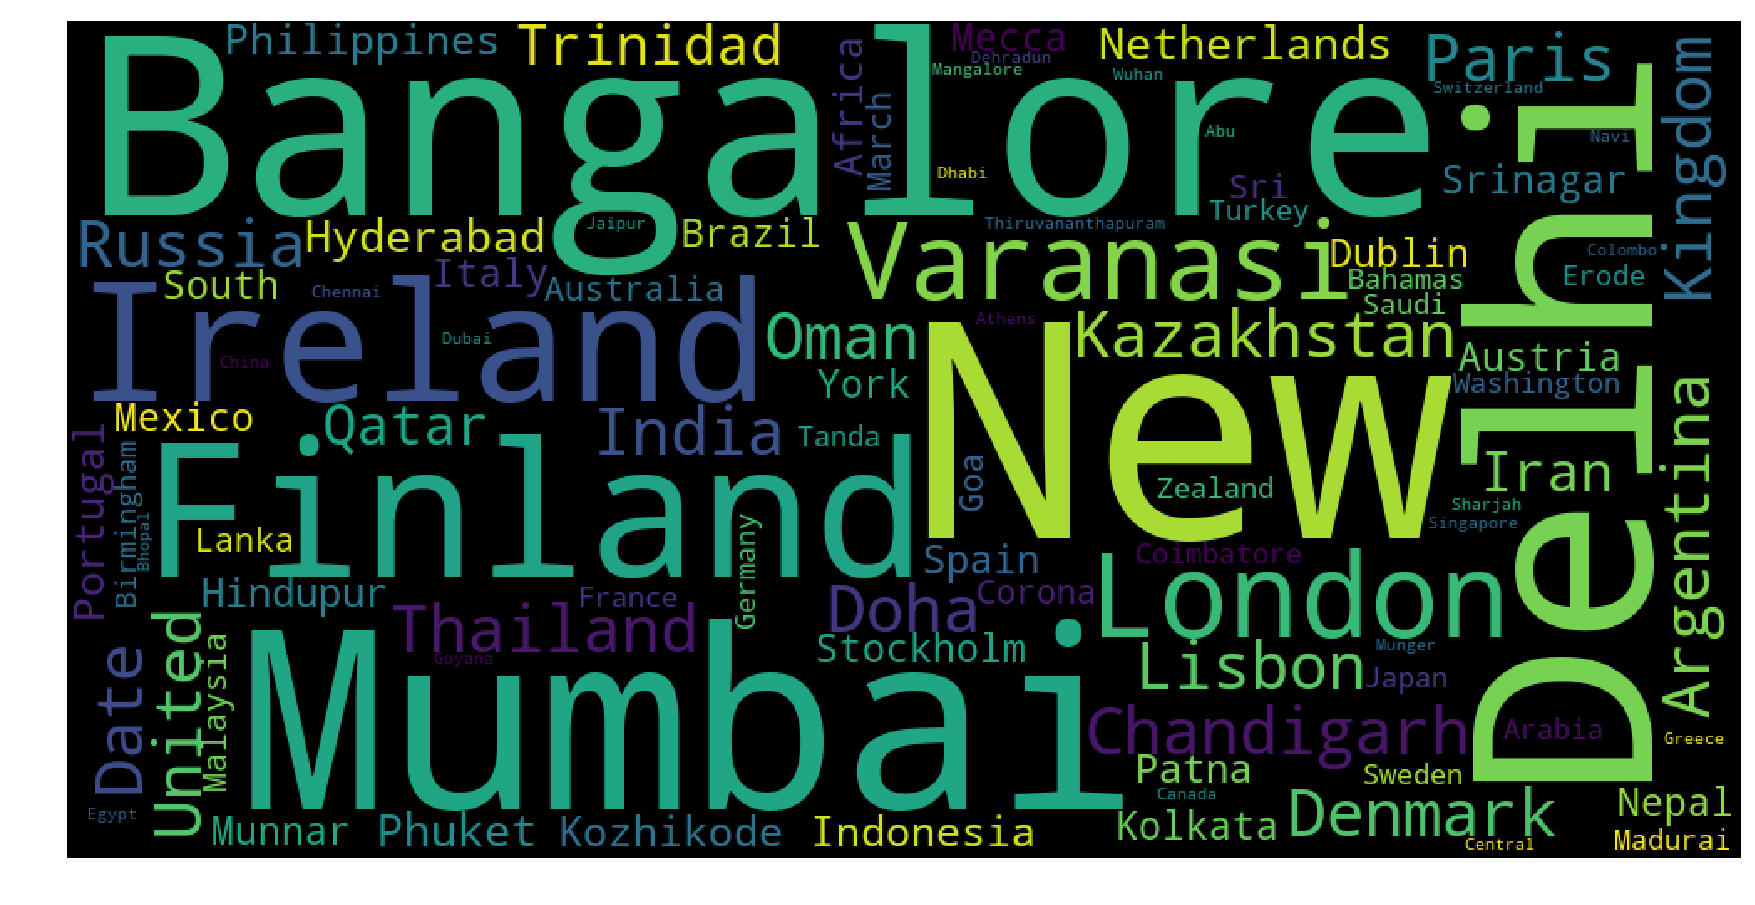

In [51]:
# convert list to string and generate the word cloud

unique_string=(" ").join(patient_travelled_places)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [57]:
# Indian states are not captured by GeoText library. Hence we will append the states to the places list and then parse through the notes.
Indian_States = ["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka",
                 "Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura",
                 "Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Delhi","Puducherry"]

other_places = ['USA','US', 'UK', 'UAE', 'USSR', 'Middle East', 'Bilaspur', 'Allahabad', 'Bengaluru', 'Abhudhabi', 'Abu Dhabi', 'Trivandrum', 'Scotland', 'Baharain']
misc = ['travelled', 'Travel history']
full_places_list = patient_travelled_places + Indian_States + other_places + misc
place_search_pattern = '|'.join(full_places_list)

no_travel_hist = ['No travel history', 'no history of travel', 'No recent history of travel', 'no travel', 'not travelled recently', 'not travelled']
no_travel_hist_search_pattern = '|'.join(no_travel_hist)

detailes_awaited = ['Details yet to recieve', 'no details', 'details awaited', 'details unknown', 'unknown', 'yet to receive details', 'details yet to receive']
detailes_awaited_search_pattern = '|'.join(detailes_awaited)

covid19_patients['notes'] = covid19_patients['notes'].replace('Details Awaited', 'Details awaited')
covid19_patients['notes'] = np.where((covid19_patients.notes.str.contains("No Travel history", False)),'No travel history',covid19_patients.notes)
covid19_patients['notes'] = np.where((covid19_patients.notes.str.contains("under process", False)),'Details awaited',covid19_patients.notes)



# Create a temp copy dataframe...
temp = covid19_patients.copy()

primary_secondary_contact = ['father', 'mother', 'brother', 'sister', 'spouse', 'son', 'daughter', 'husband', 'wife', 'Uncle', 'Aunt', 'Family', 'relative', 'related', 'parents']
person_search_pattern = '|'.join(primary_secondary_contact)

contact_transmission = ['neighbour', 'working with', 'contact', 'transmission', 'doctor', 'nurse', 'Roommate', 'domestic worker', 'employee of', 'accompanied', 'driver']
contact_trans_search_pattern = '|'.join(contact_transmission)

temp['notes'] = np.where((temp.notes.str.contains(no_travel_hist_search_pattern, False)),'No recent travel history',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(place_search_pattern, False)),'Recent travel history',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(person_search_pattern, False)),'from family member',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(contact_trans_search_pattern, False)),'Contact Transmission',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(detailes_awaited_search_pattern, False)),'Details awaited',temp.notes)

temp = pd.DataFrame(temp.groupby('notes')['notes'].count().sort_values(ascending=False))
temp.columns = ['count']
temp = temp.reset_index()

details_awaited = temp[temp['notes'] == 'Details awaited']
temp = temp[temp['notes'] != 'Details awaited']

In [53]:
fig = px.bar(temp.head(10).sort_values('count', ascending=True), x='count', y='notes', orientation='h', text='count', width=1000,
       color_discrete_sequence = ['#3e78b5'], title='Patient History & Notes...')
fig.update_xaxes(title='')
fig.update_yaxes(title='')

fig.update_layout(
    margin=dict(l=400, r=10, t=40, b=10),
    paper_bgcolor="LightSteelBlue",)

### Other key factors from patient notes...

In [54]:
pat_wo_travel_history = temp[temp['notes'] != 'Recent travel history']
pat_w_travel_history = temp[temp['notes'] =='Recent travel history']

colors = ['#ff2e63', '#21bf73']

pat_wo_travel_history_percent = round(pat_wo_travel_history['count'].sum()/covid19_patients['notes'].count()*100, 2)
pat_w_travel_history_percent = round(pat_w_travel_history['count'].sum()/covid19_patients['notes'].count()*100, 2)
details_awaited_percent = round(details_awaited['count'].sum()/covid19_patients['notes'].count()*100, 2)
                         
fig = px.pie(pat_w_travel_history, values=[pat_wo_travel_history_percent, pat_w_travel_history_percent, details_awaited_percent], 
             names=['Patients with no Recent Travel History', 'Patients with Recent Travel History', 'Details Awaited'],
             title='Patients with and without Travel History')
fig.show()

### Reasons that patients without travel history got infected...

(-0.5, 999.5, 499.5, -0.5)

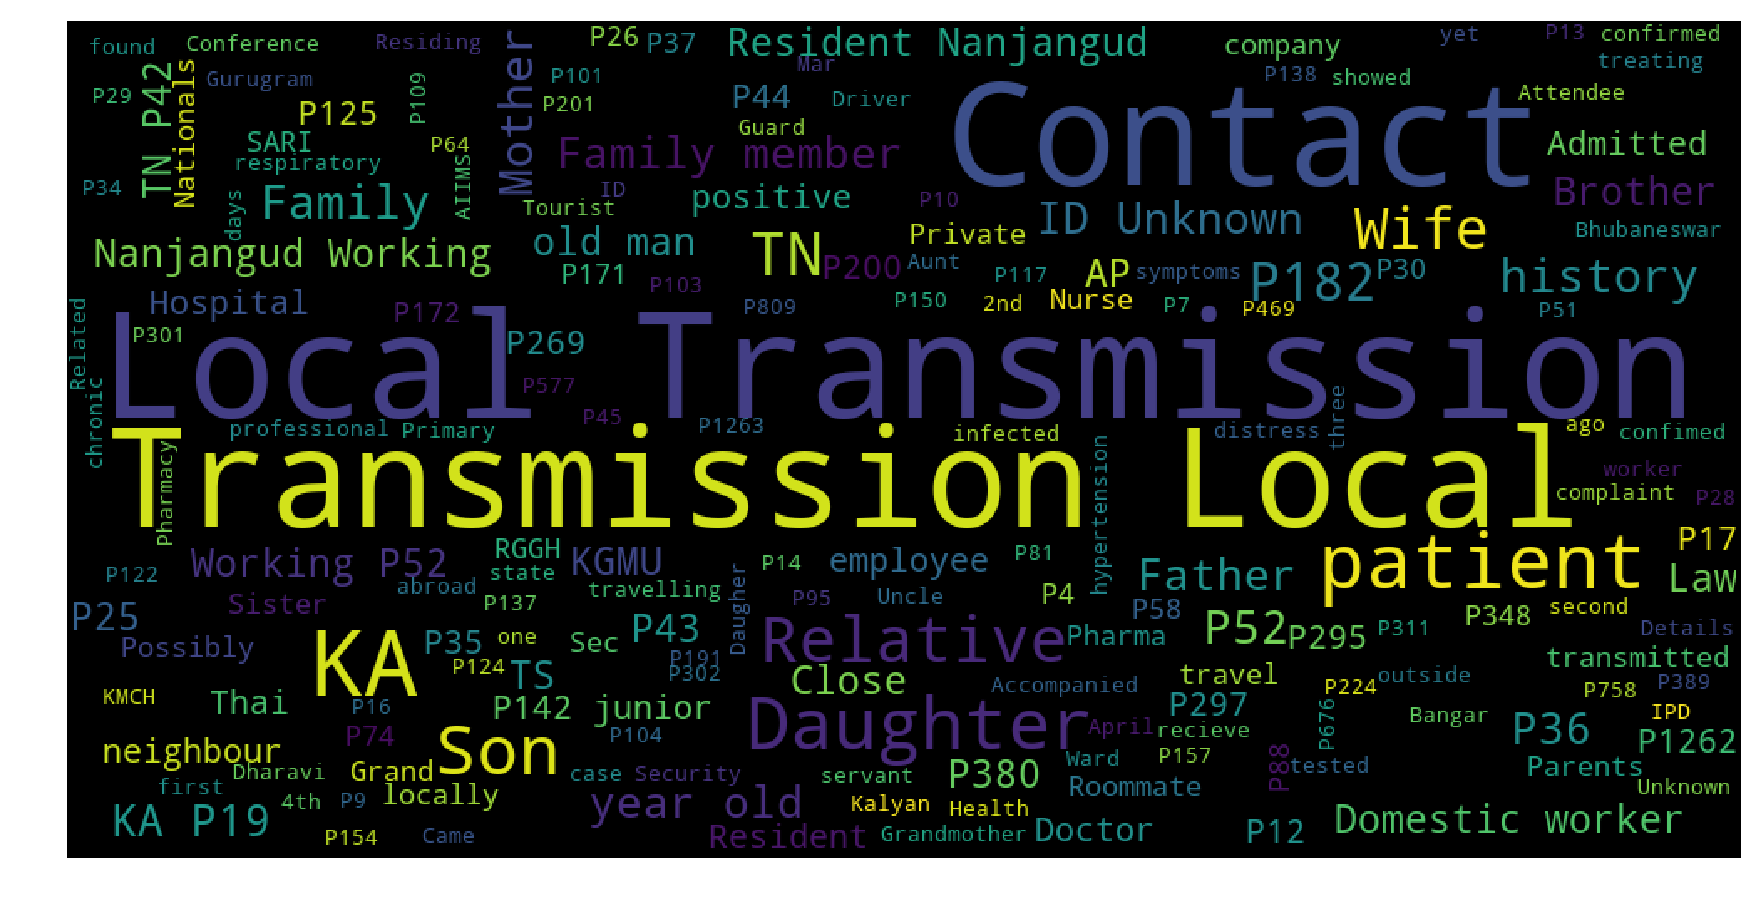

In [72]:
other_reasons_df = covid19_patients.copy()
other_reasons_df['notes'] = np.where((other_reasons_df.notes.str.contains(place_search_pattern, False)),' ',other_reasons_df.notes)
other_reasons_df['notes'] = np.where((other_reasons_df.notes.str.contains('details awaited', False)),' ',other_reasons_df.notes)

unique_string=(" ").join(other_reasons_df['notes'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

# INDIAN COUNCIL OF MEDICAL RESEARCH Testing...

**Homepage -** [https://icmr.nic.in/content/covid-19](https://icmr.nic.in/content/covid-19)

In [80]:
ICMR_testing_details = pd.read_csv("../input/covid19-in-india/ICMRTestingDetails.csv")
ICMR_testing_details.tail(3)

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
20,21,06/04/20 21:00,101068.0,NaN,NaN,NaN
21,22,07/04/20 21:00,114015.0,NaN,NaN,NaN
22,23,08/04/20 21:00,127919.0,NaN,NaN,NaN


In [75]:
ICMR_testing_details ['DateTime'] =pd.to_datetime(ICMR_testing_details .DateTime,dayfirst=True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['TotalSamplesTested'],
                    mode='lines+markers',name='TotalSamplesTested'))

fig.add_trace(go.Scatter(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['TotalIndividualsTested'], 
                mode='lines+markers',name='TotalIndividualsTested'))

fig.add_trace(go.Scatter(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['TotalPositiveCases'], 
                mode='lines+markers',name='TotalPositiveCases'))

fig.update_layout(title_text='ICMR TEST conducted for COVID19',plot_bgcolor='rgb(225,230,255)')
fig.show()

# State-wise Numbers and Analysis...

### Number of States / Union Territories affected progressively...

In [89]:
no_of_states = covid19_complete.groupby('Date')['State_UT'].unique().apply(len).values
dates = covid19_complete.groupby('Date')['State_UT'].unique().apply(len).index

fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=[36 for i in range(len(no_of_states))], 
                         mode='lines', name='# States / Union Territory', 
                         line = dict(color='#000000', dash='dash')))

fig.add_trace(go.Scatter(x=dates, y=no_of_states, hoverinfo='x+y',
                         mode='lines', name='# Affected States / Union Territory', 
                         line = dict(color='#2dfa48')))

fig.update_layout(title='No. of affected States / Union Territory', 
                  xaxis_title='Date', yaxis_title='No. of affected States / Union Territory')

fig.update_traces(textposition='top center')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# On the Map...

In [55]:
India = folium.Map(location = [India_Latitude,India_Longitude], min_zoom=4, max_zoom=6, zoom_start=4.5, tiles = 'cartodbpositron')

for lat, long, confirmed, active, deaths, recovered, state in zip(latest['Latitude'],
                                                           latest['Longitude'],
                                                           latest['Confirmed'],
                                                           latest['Active'],
                                                           latest['Deaths'],
                                                           latest['Recovered'], 
                                                           latest['State_UT']):

    if (deaths == 0):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Active:</strong> ' + str(int(active)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(55, 83, 109)').add_to(India)

    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Active:</strong> ' + str(int(active)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(26, 118, 255)').add_to(India)
        
India


An initial level analysis. This will be updated ...